 Starting Zumi 
Pi Zero I2C is available
Gyro offset file already exists.
Verified Pi Zero is the same
Gyroscope previously calibrated
Creating new offset file...
.
.
samples per second
86.56752198872532


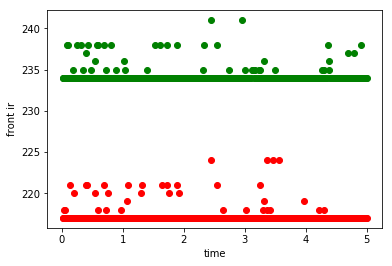

In [2]:
from zumi.zumi import Zumi
from zumi.util.screen import Screen
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import time

time_out =5


zumi = Zumi()
zumi.reset_gyro()
zumi.mpu.calibrate_MPU()

#zumi.MIN_I2C_DELAY = 0.00
#create list for the readings to be graphed
time_list = []
r_bott_list = []
l_bott_list = []

r_front_list = []
l_front_list = []

r_back_list = []
l_back_list = []

x_acc_list = []

time_passed = 0
init_time = time.time()

while(time_passed <= time_out):
    ir_readings = zumi.get_all_IR_data()
    
    bottom_right_ir = ir_readings[1]
    bottom_left_ir = ir_readings[3]
    
    front_right_ir = ir_readings[0]
    front_left_ir = ir_readings[5]
    
    back_right_ir = ir_readings[2]
    back_left_ir = ir_readings[4]
#     if (front_right_ir > 250 or front_left_ir > 250):
#         ir_readings = zumi.get_all_IR_data()
#         bottom_right_ir = ir_readings[1]
#         bottom_left_ir = ir_readings[3]
    
#         front_right_ir = ir_readings[0]
#         front_left_ir = ir_readings[5]
    
#         back_right_ir = ir_readings[2]
#         back_left_ir = ir_readings[4]

        
     
    time_passed = time.time()-init_time
    
    #add data to lists
    time_list.append(time_passed)
    
    r_bott_list.append(bottom_right_ir)
    l_bott_list.append(bottom_left_ir)
    
    r_front_list.append(front_right_ir)
    l_front_list.append(front_left_ir)
    
    r_back_list.append(back_right_ir)
    l_back_list.append(back_left_ir)


print("samples per second")
print(len(time_list)/time_passed)

# plt.plot(time_list,l_bott_list,'ro',time_list,r_bott_list,'bo')
# plt.ylabel('bottom ir')
# plt.xlabel('time')
# plt.show()

plt.plot(time_list,l_front_list,'go',time_list,r_front_list,'ro')
plt.ylabel('front ir')
plt.xlabel('time')
plt.show()

# plt.plot(time_list,l_back_list,'go',time_list,r_back_list,'ro')
# plt.ylabel('back ir')
# plt.xlabel('time')
# plt.show()


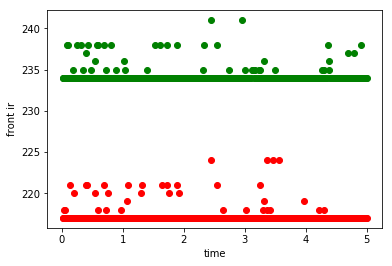

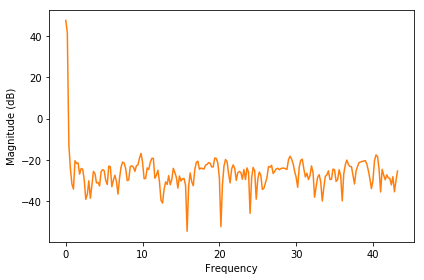

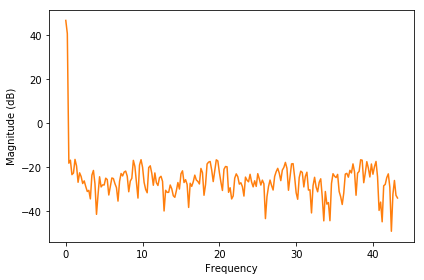

In [4]:
plt.plot(time_list,l_front_list,'go',time_list,r_front_list,'ro')
plt.ylabel('front ir')
plt.xlabel('time')
plt.show()

f = len(time_list)/time_passed
plt.magnitude_spectrum(l_front_list, Fs=f,scale='dB', color='C1')
plt.tight_layout()
plt.show()


f = len(time_list)/time_passed
plt.magnitude_spectrum(r_front_list, Fs=f,scale='dB', color='C1')
plt.tight_layout()
plt.show()

# cxy, f = plt.cohere(l_front_list, r_front_list, 256, f)
# plt.tight_layout()
# plt.show()